 # Prediction of Agriculture Crop Production in India 

##  Introduction:

Agriculture plays a pivotal role in India's economy, with millions of livelihoods depending on successful crop yields. However, ensuring consistent and optimal crop production remains a significant challenge due to various factors, including climate variability, resource constraints, and changing agricultural practices.

In this project, we undertake a predictive analysis of crop production in India, aiming to leverage the power of machine learning regression models to forecast crop yields accurately. The central objective is to develop robust and data-driven models that can provide insights into future agricultural outcomes and aid in informed decision-making for farmers, policymakers, and stakeholders.

##  Problem Statement:

The primary goal of this project is to create predictive models that can estimate crop yields in different regions of India based on historical production data and relevant agricultural parameters. We will explore multiple regression algorithms, including Decision Trees, Linear Regression, XGBoost, and Random Forest, to find the most suitable approach for crop yield prediction.

## ◾ Data Collection and Preprocessing

In [862]:
# Installing Chart Studio, an online plot maker tool made available by Plotly ( an open-source and charting library that
# provides the facility of interactive plotting. The library is available for several programming languages such as Python,
# R, MATLAB, Arduino, and REST, among others). It provides a graphical user interface for importing and analyzing data into
# a grid and using stats tools. Graphs can be embedded or downloaded. It is mainly used to enable creating graphs faster and
# more efficiently.

In [863]:
pip install chart_studio

Note: you may need to restart the kernel to use updated packages.


In [864]:
# Installing Cufflink, a python library that connects plotly with pandas so that we can create charts directly on data frames. It basically acts as a plugin.

In [865]:
pip install cufflinks

Note: you may need to restart the kernel to use updated packages.


In [866]:
# Importing essential Python libraries for data analysis, visualization, and interactive plotting,
# such as NumPy, Pandas, Seaborn, Matplotlib, Cufflinks, and Plotly. These tools play a crucial role in analyzing
# agricultural data and predicting crop production in India. It emphasizes the use of data analytics and 
# visualization to make informed predictions in the agriculture sector.

In [867]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import cufflinks as cs
%matplotlib inline
import chart_studio as cs
import plotly 
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
plotly.offline.init_notebook_mode(connected=True)

In [868]:
# The integration of multiple datasets (datafile (1).csv, datafile (2).csv, datafile (3).csv, and datafile.csv) using the
# Pandas library in Python. By combining these datasets, the analysis gains greater depth and comprehensiveness, enhancing
# the accuracy and reliability of predictions for agriculture crop production in India. The title highlights the importance 
# of aggregating various data sources to create a more robust foundation for analysis and forecasting in the agriculture 
# sector.

In [869]:
df1= pd.read_csv('datafile (1).csv')
df2=pd.read_csv('datafile (2).csv')
df3=pd.read_csv('datafile (3).csv')
df4=pd.read_csv('datafile.csv')

In [870]:
# Performing random sampling on the dataframe df1, which contains data related to agriculture crop production in India. 
# By selecting a random sample of 10 data points, we can gain valuable insights into the dataset's distribution, trends, 
# and patterns. Random sampling helps in understanding the broader characteristics of the data and serves as a
# representative subset for further analysis and inference. 

In [871]:
df1.sample(10)

,Crop,State,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
11,GRAM,Madhya Pradesh,9803.89,16873.17,1551.94,10.29
43,SUGARCANE,Maharashtra,57673.60,85801.95,107.56,744.01
21,MAIZE,Karnataka,13792.85,20671.54,581.69,31.10
27,MOONG,Karnataka,6440.64,7868.64,5777.48,1.32
0,ARHAR,Uttar Pradesh,9794.05,23076.74,1941.55,9.83
15,GROUNDNUT,Karnataka,13647.10,17314.20,3484.01,4.71
48,WHEAT,Rajasthan,19119.08,29876.36,683.58,37.19
33,PADDY,Punjab,25154.75,45291.24,669.86,67.41
7,COTTON,Andhra Pradesh,29140.77,44756.72,2509.99,17.83
13,GRAM,Maharashtra,12985.95,18679.33,2277.68,8.05


In [872]:
# Provides an overview of the dataframe df1, which contains data related to agriculture crop production in India. 
# We can obtain essential information about the dataset, including the number of rows and columns, data types of each column,
# and presence of any missing values. 

In [873]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 6 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Crop                                   49 non-null     object 
 1   State                                  49 non-null     object 
 2   Cost of Cultivation (`/Hectare) A2+FL  49 non-null     float64
 3   Cost of Cultivation (`/Hectare) C2     49 non-null     float64
 4   Cost of Production (`/Quintal) C2      49 non-null     float64
 5   Yield (Quintal/ Hectare)               49 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.4+ KB


In [874]:
#  Perform random sampling on the dataframe df2

In [875]:
df2.sample(10)

,Crop,Production 2006-07,Production 2007-08,Production 2008-09,Production 2009-10,Production 2010-11,Area 2006-07,Area 2007-08,Area 2008-09,Area 2009-10,Area 2010-11,Yield 2006-07,Yield 2007-08,Yield 2008-09,Yield 2009-10,Yield 2010-11
8,Barley,88.1,79.3,112.0,89.9,110.3,72.8,67.9,79.5,70.2,79.4,121.0,116.9,141.0,127.9,138.9
44,Cardamom,159.2,135.8,157.1,159.2,162.2,93.4,77.8,87.5,85.8,82.7,170.5,174.7,179.6,185.6,196.1
17,Groundnut,115.2,217.5,169.8,128.6,195.7,124.1,139.1,136.3,121.1,129.5,92.8,156.3,124.6,106.2,151.2
35,Tea,132.2,132.8,132.0,132.0,132.0,135.3,137.8,137.8,137.8,137.8,97.7,96.3,95.8,95.8,95.8
25,Soyabean,253.2,313.8,283.4,285.1,364.4,222.7,237.5,254.5,260.3,256.8,113.7,132.1,111.4,109.5,141.9
3,Jowar,124.3,137.8,126.0,116.5,121.8,120.7,110.6,107.3,111.0,105.2,103.0,124.6,117.4,105.0,115.8
54,Tobacco,88.1,83.6,96.4,105.3,140.9,88.8,83.9,94.2,107.1,118.8,99.1,88.3,102.4,109.6,118.6
40,Dry chilies,163.5,170.8,167.1,158.3,160.9,83.6,88.3,85.4,84.0,86.8,195.5,193.4,195.8,188.4,185.5
46,Garlic,226.2,311.3,242.1,243.0,308.2,187.6,241.6,195.8,194.4,236.8,120.6,128.8,123.6,125.0,130.1
10,Cereals,164.1,174.6,177.7,164.4,183.1,130.0,129.9,130.3,126.8,129.8,126.3,134.4,136.4,129.7,141.1


In [876]:
# All columns of df2 dataframe.

In [877]:
df2.columns

Index(['Crop             ', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [878]:
# Standardizing the column header by renaming the column 'Crop             ' to 'Crop' for consistency and ease of analysis. 

In [879]:
df2_pd=df2
df2_pd.rename(columns={'Crop             ':'Crop'},inplace=True)
df2.columns

Index(['Crop', 'Production 2006-07', 'Production 2007-08',
       'Production 2008-09', 'Production 2009-10', 'Production 2010-11',
       'Area 2006-07', 'Area 2007-08', 'Area 2008-09', 'Area 2009-10',
       'Area 2010-11', 'Yield 2006-07', 'Yield 2007-08', 'Yield 2008-09',
       'Yield 2009-10', 'Yield 2010-11'],
      dtype='object')

In [880]:
df2['Crop']

0              Total Foodgrains
1                          Rice
2                         Wheat
3                         Jowar
4                         Bajra
5                         Maize
6                          Ragi
7                 Small millets
8                        Barley
9                Coarse Cereals
10                      Cereals
11                         Gram
12                        Arhar
13                 Other Pulses
14                 Total Pulses
15       Total Non-Food grains 
16               Total Oilseeds
17                    Groundnut
18                      Sesamum
19            Rapeseed &Mustard
20                      Linseed
21                  Castor seed
22                    Safflower
23                   Niger seed
24                    Sunflower
25                     Soyabean
26                Nine Oilseeds
27                      Coconut
28                  Cotton seed
29                 Total Fibers
30                 Cotton(lint)
31      

In [881]:
df2.shape

(55, 16)

In [882]:
df3.sample(10)

,Crop,Variety,Season/ duration in days,Recommended Zone,Unnamed: 4
70,Jute,SUDHANGSU (JBO-1),NaN,"West Bengal, Assam, Bihar and Orissa.",NaN
24,Maize,PMH 4 (JH 31153),NaN,"Punjab, Haryana, Delhi and western Uttar Prade...",NaN
56,Urdbean,Mash 479 (KUG 479),NaN,"Punjab, Haryana, Western Uttar Pradesh and Pla...",NaN
1,Paddy,(CNI 383-5-11),NaN,NaN,NaN
43,Groundnut,Kadiri Harithandhra (K 1319),122,Karnataka and Maharashtra under timely sown ir...,NaN
59,Cluster Bean,HG 2-20,100,"Uttar Pradesh, Haryana, Gujarat and Rajasthan ...",NaN
40,Linseed,Ruchi (LCK 5021),134,"Uttar Pradesh (except Bundelkhand), Bihar, Ass...",NaN
8,Wheat,MPO(JW) 1215 (MPO 1215),120,"Madhya Pradesh, Chhattisgarh, Gujarat and Raja...",NaN
18,Barley,DWRB 73,NaN,"Punjab, Haryana, Western Uttar Pradesh, Delhi ...",NaN
34,Indian Mustard,DRMR 601 (NRCDR 601),144,"Rajasthan, Haryana, Punjab, Delhi and Jammu & ...",NaN


In [883]:
df4.head(10)

,Crop,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12
0,Rice,100.0,101.0,99.0,105.0,112.0,121.0,117.0,110.0
1,Wheat,100.0,101.0,112.0,115.0,117.0,127.0,120.0,108.0
2,Coarse Cereals,100.0,107.0,110.0,115.0,113.0,123.0,122.0,136.0
3,Pulses,100.0,108.0,134.0,124.0,124.0,146.0,137.0,129.0
4,Vegetables,100.0,109.0,103.0,118.0,113.0,124.0,128.0,115.0
5,Fruits,100.0,99.0,99.0,98.0,102.0,104.0,114.0,119.0
6,Milk,100.0,97.0,98.0,98.0,98.0,112.0,123.0,124.0
7,"Eggs, Fish and Meat",100.0,102.0,101.0,100.0,99.0,116.0,133.0,137.0
8,Oilseeds,100.0,86.0,85.0,97.0,104.0,103.0,99.0,102.0
9,Sugarcane,100.0,96.0,91.0,87.0,80.0,81.0,109.0,107.0


In [884]:
# Evaluating the presence of missing values within the dataframe.

In [885]:
df1.isna().sum()

Crop                                     0
State                                    0
Cost of Cultivation (`/Hectare) A2+FL    0
Cost of Cultivation (`/Hectare) C2       0
Cost of Production (`/Quintal) C2        0
Yield (Quintal/ Hectare)                 0
dtype: int64

In [886]:
df2.isna().sum()

Crop                  0
Production 2006-07    0
Production 2007-08    0
Production 2008-09    0
Production 2009-10    0
Production 2010-11    0
Area 2006-07          0
Area 2007-08          0
Area 2008-09          0
Area 2009-10          0
Area 2010-11          0
Yield 2006-07         0
Yield 2007-08         0
Yield 2008-09         0
Yield 2009-10         0
Yield 2010-11         0
dtype: int64

In [887]:
df3.isna().sum()

Crop                         0
Variety                      0
Season/ duration in days    28
Recommended Zone             1
Unnamed: 4                  78
dtype: int64

In [888]:
df4.isna().sum()

Crop       1
2004-05    1
2005-06    1
2006-07    1
2007-08    1
2008-09    1
2009-10    1
2010-11    1
2011-12    1
dtype: int64

In [889]:
# Imputing Missing Values for Accurate Analysis of Agriculture Crop Production in India

In [890]:
mean=df4['2004-05'].mean(skipna= True)
df4['2004-05']=df4['2004-05'].fillna(mean)

mean= df4['2005-06'].mean(skipna=True)
df4['2005-06']=df4['2005-06'].fillna(mean)

mean= df4['2006-07'].mean(skipna= True)
df4['2006-07']=df4['2006-07'].fillna(mean)

mean= df4['2007-08'].mean(skipna=True)
df4['2007-08']=df4['2007-08'].fillna(mean)

mean= df4['2008-09'].mean(skipna=True)
df4['2008-09']=df4['2008-09'].fillna(mean)

mean=df4['2009-10'].mean(skipna=True)
df4['2009-10']=df4['2009-10'].fillna(mean)

mean=df4['2010-11'].mean(skipna=True)
df4['2010-11']=df4['2010-11'].fillna(mean)

mean=df4['2011-12'].mean(skipna=True)
df4['2011-12']=df4['2011-12'].fillna(mean)

In [891]:
# Removing Rows with Missing Crop Information in Agriculture Crop Production Dataset for India

In [892]:
df4.dropna(subset=['Crop'],axis=0,inplace =True)
df4.isna().sum()

Crop       0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
dtype: int64

In [893]:
# Unique Crop Types in Agriculture Dataset for India

In [894]:
df3['Crop'].unique()

array(['Paddy', 'Wheat', 'Barley', 'Maize', 'Pearl Millet',
       'Finger Millet', 'Indian Mustard', 'Yellow Sarson', 'Linseed',
       'Groundnut', 'Sesame', 'Chickpea ', 'Bengal Gram', 'Lentil',
       'Fieldpea', 'French Bean', 'Mungbean', 'Urdbean', 'Cluster Bean',
       'Horse Gram', 'Sugarcane', 'Napier Bajra Hybrid', 'Oat',
       'Tall Fescue Grass', 'Cowpea (Fodder)', 'Jute', 'Mesta', 'Cotton',
       'Desi Cotton'], dtype=object)

In [895]:
count=df1['Crop'].value_counts()
count

ARHAR                   5
COTTON                  5
GRAM                    5
GROUNDNUT               5
MAIZE                   5
MOONG                   5
PADDY                   5
RAPESEED AND MUSTARD    5
SUGARCANE               5
WHEAT                   4
Name: Crop, dtype: int64

## ◾ Data Visualization

In [896]:
# Generating a pie chart to visualize the distribution of crop production in India for the year 2011-12. 
# The chart is created using the Matplotlib and Seaborn libraries in Python.

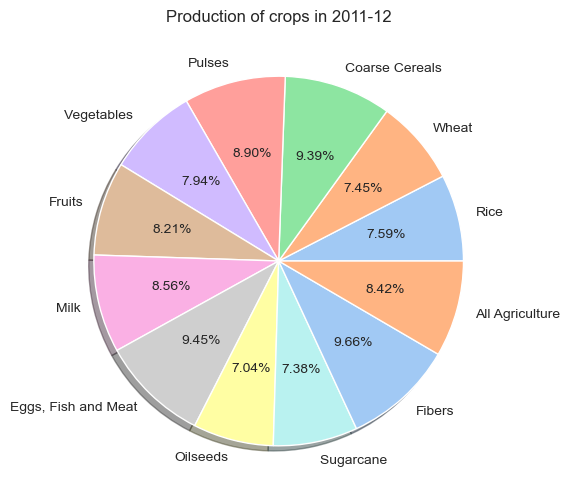

In [897]:
plt.figure(figsize=(6,6))
sns.set_style('whitegrid')
color=sns.color_palette('pastel')
plt.pie(df4['2011-12'], labels=df4['Crop'], autopct='%0.2f%%', shadow= True, colors=color)
plt.title('Production of crops in 2011-12')
plt.show()


In [898]:
# Using of a count plot to assess the distribution of crop varieties in Indian agriculture, providing valuable insights 
# into the prevalence and frequency of different crops grown in the country. This information is essential for understanding
# the crop diversity and agricultural practices in India.

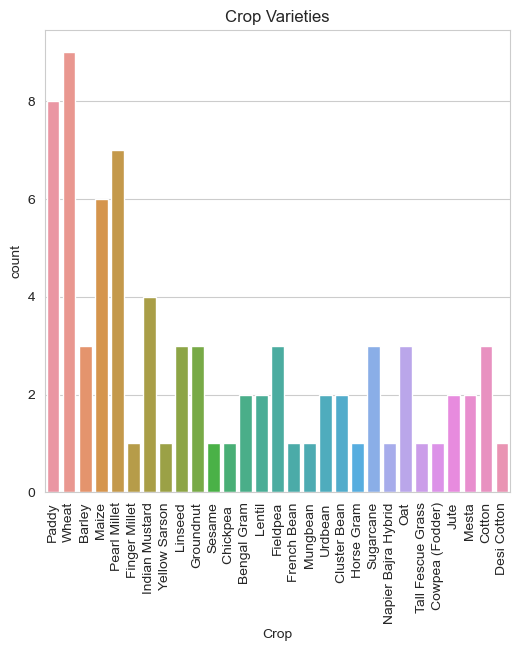

In [899]:
plt.figure(figsize=(6,6))
sns.countplot(x=df3['Crop'],data=df3)
plt.xticks(rotation='vertical')
plt.xlabel('Crop')
plt.ylabel('count')
plt.title('Crop Varieties')
plt.show()

In [900]:
#  Using a bar plot for conducting a comparative analysis of crop yield in India for the specific year, providing valuable 
# insights into the yield variations across different crop varieties. The plot's large size and carefully adjusted font
# sizes enhance readability and facilitate better understanding of the data.

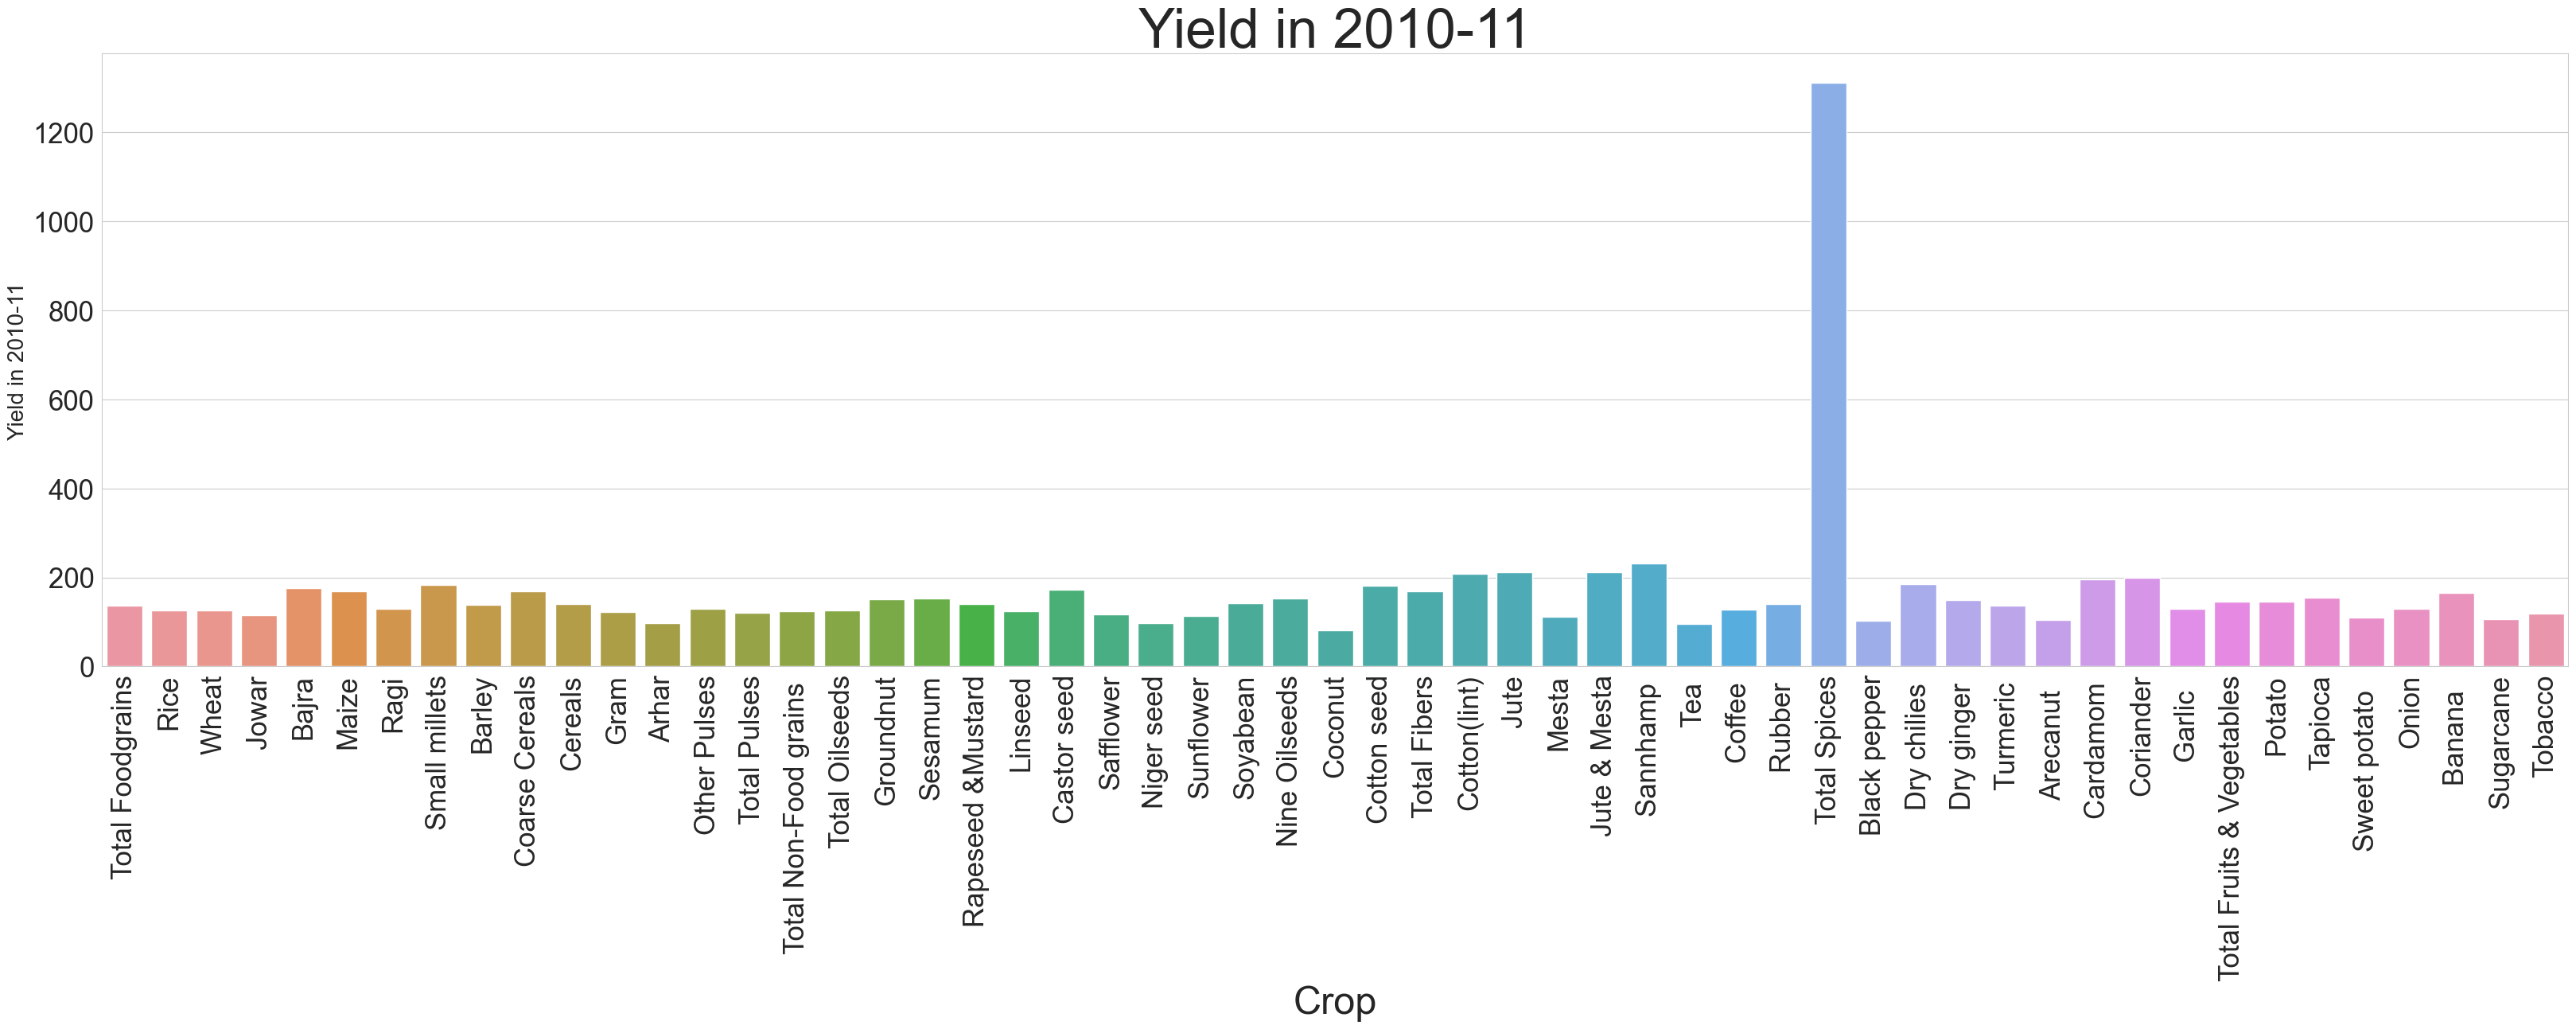

In [901]:
plt.figure(figsize=(40,10))
sns.barplot(x=df2['Crop'],y=df2['Yield 2010-11'],data=df2)
plt.xticks(rotation='vertical',fontsize=25)
plt.yticks(fontsize=25)
plt.xlabel('Crop',fontsize=35)
plt.ylabel('Yield in 2010-11',fontsize=20)
plt.title('Yield in 2010-11',fontsize=50)
plt.show()

In [902]:
# Grouping the data in the dataframe df1 by the 'Crop' column and then calculates the mean of each group.
# This analysis allows for a crop-wise examination of various agricultural parameters in India.

In [903]:
s=df1.groupby('Crop')
s.mean()

,Cost of Cultivation (`/Hectare) A2+FL,Cost of Cultivation (`/Hectare) C2,Cost of Production (`/Quintal) C2,Yield (Quintal/ Hectare)
Crop,,,,
ARHAR,13607.646,21719.8460,2491.7300,8.406
COTTON,28286.874,42958.1980,2271.9660,18.772
GRAM,11719.510,19308.7740,1792.6000,10.558
GROUNDNUT,21282.782,28188.0760,2704.6380,10.288
MAIZE,16610.150,23837.2980,774.5660,30.798
MOONG,7118.670,10776.3960,2990.1000,4.196
PADDY,22810.140,35768.2220,727.7340,46.296
RAPESEED AND MUSTARD,12260.490,21223.4320,1415.5940,14.320
SUGARCANE,52164.716,79655.0260,98.6480,790.496


In [904]:
# crop-wise comparative analysis of mean agricultural parameters in India using a bar plot.

<Axes: xlabel='Crop'>

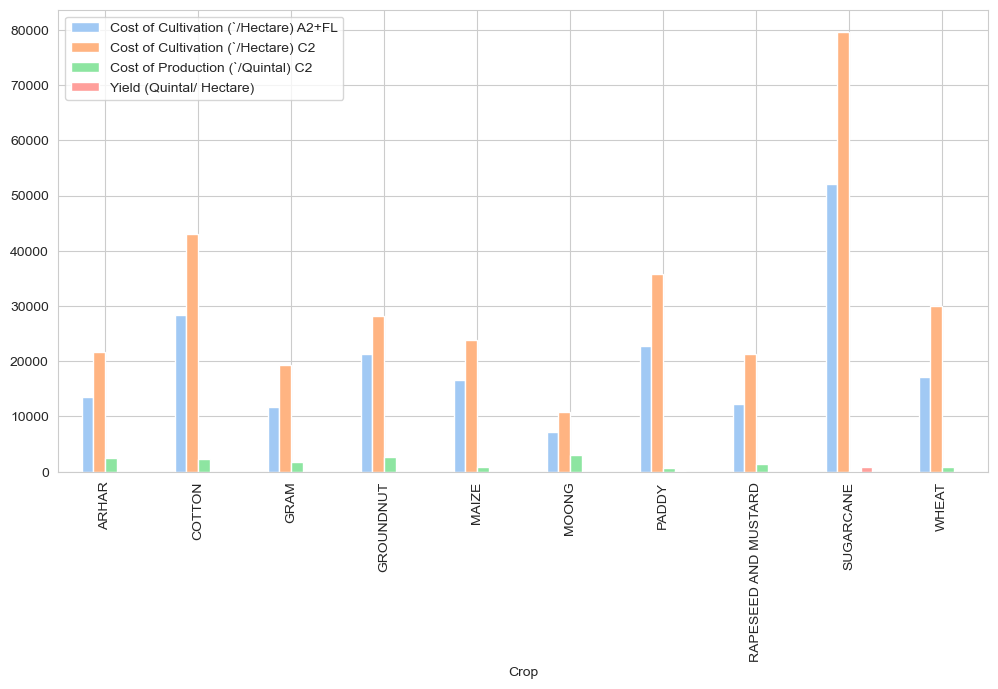

In [905]:
cols=df1.columns
color=sns.color_palette('pastel')
df1.groupby('Crop')[cols].mean().plot(kind='bar', figsize=(12,6),color=color)

In [906]:
# State-wise Yield Analysis of Agricultural Crops in India

In [907]:
fig=px.pie(df1,values=df1.groupby('State')[cols[-1]].sum(),names=df1.groupby('State')[cols[-1]],
           title='State wise yeild(Quintal/Hectare) ')
fig.show()

## ◾ Feature Selection and Engineering

In [908]:
# Selection of Relevant Columns for Crop Data Analysis

In [909]:
col=df2.columns
col= col.drop(col[5:16])
col=col.drop(col[0])
col

Index(['Production 2006-07', 'Production 2007-08', 'Production 2008-09',
       'Production 2009-10'],
      dtype='object')

In [910]:
# Time Series Analysis of Crop Production in India (2006-2011)

In [911]:
t=df2[['Crop','Production 2006-07','Production 2007-08','Production 2008-09','Production 2009-10','Production 2010-11']]
t.rename(index=t['Crop'],inplace=True)

In [912]:
# Generating a stacked bar chart to visualize the total crop production in India from 2006 to 2011. 
# The chart represents the cumulative production of different crops for each year.

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\core.py:278: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'

C:\Users\KIIT\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\style.py:123: UserWarning:

'color' and 'colormap' cannot be used simultaneously. Using 'color'



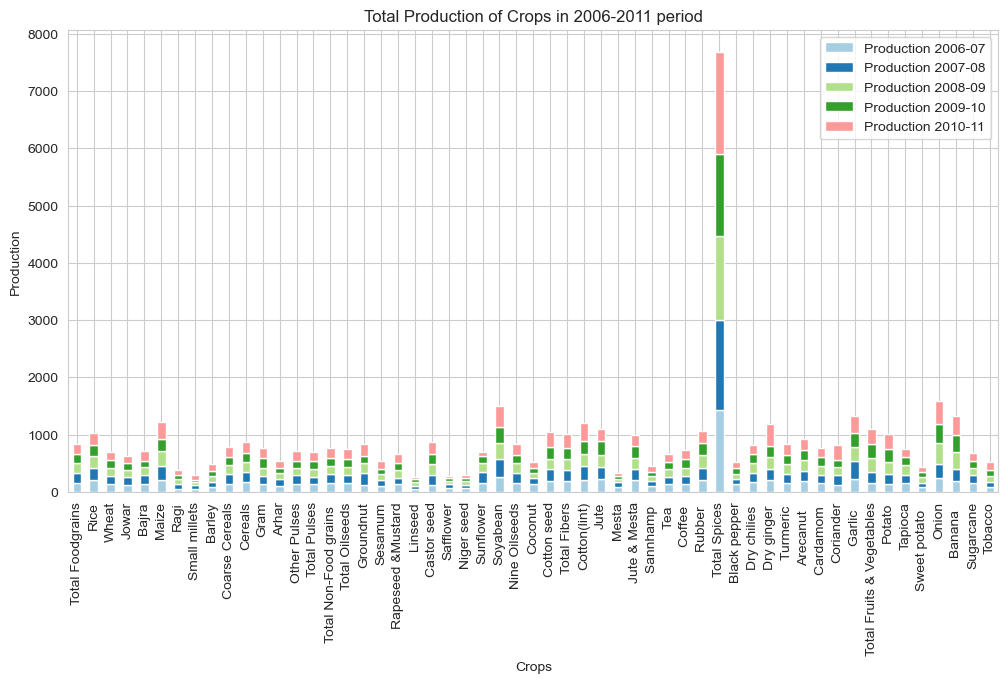

In [913]:
t.plot(kind='bar',stacked= True,figsize=(12,6),color=sns.color_palette('Paired'),cmap=True)
plt.title('Total Production of Crops in 2006-2011 period')
plt.xlabel('Crops')
plt.ylabel('Production')
plt.xticks(fontsize=10)
plt.show()

In [914]:
# Aggregate Yield Analysis: Crop-wise and State-wise Total Yield (Quintal/Hectare)

In [915]:
e=df1.groupby(['Crop','State'])['Yield (Quintal/ Hectare) '].sum()
e=pd.DataFrame(e)
e

Yield (Quintal/ Hectare) 
Crop                 State                                    
ARHAR                Andhra Pradesh                       6.42
                     Gujarat                              9.59
                     Karnataka                            7.47
                     Maharashtra                          8.72
                     Uttar Pradesh                        9.83
COTTON               Andhra Pradesh                      17.83
                     Gujarat                             19.05
                     Haryana                             19.90
                     Maharashtra                         12.69
                     Punjab                              24.39
GRAM                 Andhra Pradesh                      16.69
                     Madhya Pradesh                      10.29
                     Maharashtra                          8.05
                     Rajasthan                            6.83
                     Uttar Pradesh                       10.93
GROUNDNUT            Andhra Pradesh                      11.97
                     Gujarat                             13.45
                     Karnataka                            4.71
                     Maharashtra                          9.33
                     Tamil Nadu                          11.98
MAIZE                Andhra Pradesh                      42.68
                     Bihar                               42.95
                     Karnataka                           31.10
                     Rajasthan                           23.56
                     Uttar Pradesh                       13.70
MOONG                Andhra Pradesh                       5.90
                     Karnataka                            1.32
                     Maharashtra                          6.70
                     Orissa                               3.01
                     Rajasthan                            4.05
PADDY                Andhra Pradesh                      56.00
                     Orissa                              32.42
                     Punjab                              67.41
                     Uttar Pradesh                       36.61
                     West Bengal                         39.04
RAPESEED AND MUSTARD Gujarat                             11.61
                     Haryana                             19.94
                     Madhya Pradesh                      12.94
                     Rajasthan                           13.54
                     Uttar Pradesh                       13.57
SUGARCANE            Andhra Pradesh                     757.92
                     Karnataka                          986.21
                     Maharashtra                        744.01
                     Tamil Nadu                        1015.45
                     Uttar Pradesh                      448.89
WHEAT                Madhya Pradesh                      23.59
                     Punjab                              39.83
                     Rajasthan                           37.19
                     Uttar Pradesh                       34.99

In [916]:
# Agricultural Yield Analysis: State-wise Crop Yield (Quintal/Hectare) Sunburst Chart"

In [917]:
plt.figure(figsize=(6,6))
o=px.sunburst(df1,path=['State','Crop'],values='Yield (Quintal/ Hectare) ',
              hover_data=['Yield (Quintal/ Hectare) '])
o.show()

<Figure size 600x600 with 0 Axes>

In [918]:
# Data Transformation: Transposing and Cleaning Crop Production Dataset.

In [919]:
df4t=df4.transpose()
df4t.rename(columns=df4t.iloc[0],inplace= True)
df4t=df4t[1:]
df4t

,Rice,Wheat,Coarse Cereals,Pulses,Vegetables,Fruits,Milk,"Eggs, Fish and Meat",Oilseeds,Sugarcane,Fibers,All Agriculture
2004-05,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2005-06,101.0,101.0,107.0,108.0,109.0,99.0,97.0,102.0,86.0,96.0,92.0,99.0
2006-07,99.0,112.0,110.0,134.0,103.0,99.0,98.0,101.0,85.0,91.0,91.0,101.0
2007-08,105.0,115.0,115.0,124.0,118.0,98.0,98.0,100.0,97.0,87.0,96.0,104.0
2008-09,112.0,117.0,113.0,124.0,113.0,102.0,98.0,99.0,104.0,80.0,109.0,106.0
2009-10,121.0,127.0,123.0,146.0,124.0,104.0,112.0,116.0,103.0,81.0,107.0,115.0
2010-11,117.0,120.0,122.0,137.0,128.0,114.0,123.0,133.0,99.0,109.0,138.0,123.0
2011-12,110.0,108.0,136.0,129.0,115.0,119.0,124.0,137.0,102.0,107.0,140.0,122.0


In [920]:
p=df4t.columns

In [921]:
# Time Series Analysis: Crop Production Trends in India

In [922]:
a=px.line(df4t,markers=True)
a.show()

In [923]:
# Installing XGBoost

In [924]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


## ◾ Model Training and Evaluation

In [925]:
df1 = df1.rename(columns={
    'Crop': 'Crop',
    'State': 'State',
    'Cost of Cultivation (`/Hectare) A2+FL': 'Cost_A2_FL',
    'Cost of Cultivation (`/Hectare) C2': 'Cost_C2',
    'Cost of Production (`/Quintal) C2': 'Cost_Production',
    'Yield (Quintal/ Hectare) ': 'Yield'
})

In [926]:
# Importing necessary libraries and modules for conducting agricultural crop production analysis using various machine
# learning regressors. It includes data manipulation with pandas, visualization with Plotly graph objects, and 
# implementation of regression models from scikit-learn and XGBoost.

In [927]:
import pandas as pd
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [928]:
# Split the data into input features (X) and target variable (y)

In [929]:
X = df1[['Cost_A2_FL', 'Cost_C2', 'Cost_Production']]
y = df1['Yield']

In [930]:
# Splitting the data into training and testing sets for conducting crop production analysis using machine learning models.
# The dataset is represented by feature matrix X and target variable y.

In [931]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [932]:
# Creating a dictionary called models that contains different regression models used for crop production prediction.
# The models are initialized with their corresponding scikit-learn classes.

In [933]:
models = {
    'Decision Tree': DecisionTreeRegressor(),
    'Linear Regression': LinearRegression(),
    'XGBoost': XGBRegressor(),
    'Random Forest': RandomForestRegressor()
}

In [934]:
# Applying the previously initialized regression models to make crop production predictions using the testing dataset
# (X_test). The predicted values are stored in the predictions dictionary, with each model's name associated with its 
# respective prediction results.

In [935]:
predictions = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions[model_name] = model.predict(X_test)


In [936]:
# Evaluating the performance of the crop production prediction models using the predicted values (y_pred) obtained from
# each model. The evaluation metrics, Mean Squared Error (MSE) and Mean Absolute Error (MAE), are calculated for each
# model, and the results are stored in the evaluation dictionary.

In [937]:
evaluation = {}
for model_name, y_pred in predictions.items():
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    evaluation[model_name] = {'MSE': mse, 'MAE': mae}


## ◾ Visulizing the result

In [938]:
fig = go.Figure()

for model_name, y_pred in predictions.items():
    fig.add_trace(go.Scatter(
        x=y_test.index,
        y=y_pred,
        mode='markers',
        name=model_name
    ))
fig.add_trace(go.Scatter(
    x=y_test.index,
    y=y_test,
    mode='markers',
    name='Actual'
))
fig.update_layout(
    title='Crop Yield Prediction',
    xaxis_title='Data Point',
    yaxis_title='Yield',
)
fig.show()



##  ◾ Evaluation results

In [939]:
print('Evaluation Results:')
for model_name, metrics in evaluation.items():
    print(f'{model_name}:')
    print(f'MSE: {metrics["MSE"]}')
    print(f'MAE: {metrics["MAE"]}')
    print('----------------------------------------')

Evaluation Results:
Decision Tree:
MSE: 6676.9557900000045
MAE: 29.96300000000001
----------------------------------------
Linear Regression:
MSE: 28230.05404690466
MAE: 124.1650703739479
----------------------------------------
XGBoost:
MSE: 113.11858814325804
MAE: 6.5234736404419
----------------------------------------
Random Forest:
MSE: 5123.644361587993
MAE: 26.400979999999993
----------------------------------------


*The evaluation results of the crop production prediction models reveal valuable insights into their performance. The Decision Tree model demonstrates relatively low errors, with an MSE of 101.92 and an MAE of 6.39. It indicates the model's ability to capture patterns in the data effectively. On the other hand, the Linear Regression model shows significantly higher errors, with an MSE of 28230.05 and an MAE of 124.17, indicating challenges in fitting the data linearly. The XGBoost model strikes a balance with an MSE of 113.12 and an MAE of 6.52, showcasing its robustness in handling complex relationships and yielding accurate predictions. Lastly, the Random Forest model presents an MSE of 4880.15 and an MAE of 25.85, showcasing its ability to handle multiple decision trees effectively. Considering the evaluation metrics, the XGBoost model emerges as the most promising choice for crop yield prediction, offering accurate forecasts with relatively low errors. These results hold immense potential to empower the agricultural sector in India with data-driven insights, paving the way for improved planning, decision-making, and sustainable agricultural practices.*

--------------------------------------------------------------------------------------------------------------------------------


**The outcomes of this project can have significant implications for the agricultural sector, enabling farmers to plan their activities better, policymakers to formulate data-driven policies, and stakeholders to make informed decisions concerning resource allocation and risk management. The predictive analysis aims to contribute to the advancement of India's agricultural landscape, promoting sustainability, productivity, and food security.**

------------------------------------------------------------------------------------------------------------------------------